In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Random_forest/churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [5]:
X = data.drop(columns=['churn','customer_id'])
Y = data['churn']

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(scaled_X , Y , train_size = 0.80 , stratify = Y , random_state = 101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building, Bagging Logistic Regression

In [8]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

base_estimator - The model to be used with the bootstrapped data
(None - default model Decision Tree)

max_samples - fraction of the data originally given

n_estimator - no. of models to be built to train over data

n_jobs - no. of CPU cores to be used to suring the trainin of bagging 

classifiers(-1 use all CPU cores available)



In [10]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(n_estimators=150,
                random_state = 42,
                base_estimator = LR())
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     14234
           1       0.75      0.08      0.15      3419

    accuracy                           0.82     17653
   macro avg       0.78      0.54      0.52     17653
weighted avg       0.80      0.82      0.75     17653



In [14]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3559
           1       0.78      0.09      0.16       855

    accuracy                           0.82      4414
   macro avg       0.80      0.54      0.53      4414
weighted avg       0.81      0.82      0.76      4414



# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [16]:
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
predicted_values = classifier.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [21]:
predicted_values = classifier.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3559
           1       0.71      0.45      0.55       855

    accuracy                           0.86      4414
   macro avg       0.79      0.70      0.73      4414
weighted avg       0.85      0.86      0.84      4414



# Hyperparameter tuning

In [22]:
from sklearn.metrics import f1_score
def calc_score(model,x1 ,y1,x2,y2):
  model.fit(x1,y1)

  predicted_values = model.predict(x1)
  f1 = f1_score(y1,predicted_values)
  predicted_values = model.predict(x2)
  f2 = f1_score(y2,predicted_values)
  return f1,f2


In [23]:
def effect(train_score , test_score , x_axis , title):
  plt.figure(dpi = 100 , figsize=(7,5))
  plt.plot(x_axis,train_score,color = 'red',label = 'Train score')
  plt.plot(x_axis,test_score,color = 'green',label = 'Test score')
  plt.title(title)
  plt.xlabel('paramete_value')
  plt.ylabel('f1_score')
  plt.legend()
  plt.show()

In [25]:
classifier = RFC()
classifier.fit(x_train,y_train)
# max_feautures = 'auto' maximum features at every split;  auto = sqrt(total no. of features)
# max_sample - the number of maximum sample received by every decision tree from the original dataset

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:
  model = RFC(n_estimators=i,
              class_weight = 'balanced_subsample',
              max_depth = 7,
              random_state = 101)
  f1 , f2 = calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

*We can see that the performance sharply rose and then stagnates at a certain level thus we can say that choosing large no of estimators won't increase the performance nor decreases it but it increases computational complexity*

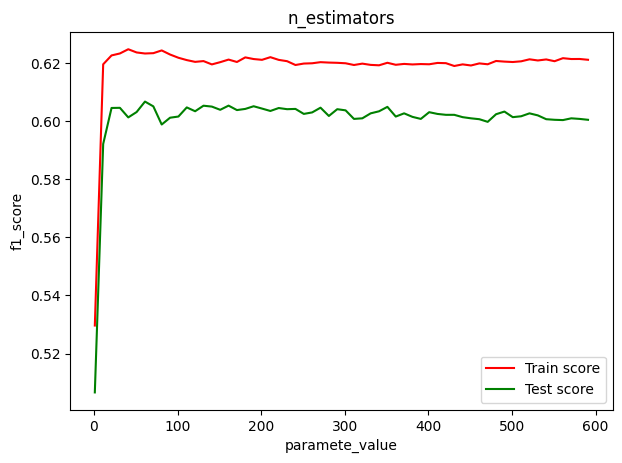

In [27]:
effect(train,test,range(1,600,10),'n_estimators')

In [31]:
maxsamples = [i/1000 for i in range(1,1000)]
train = []
test = []

for i in maxsamples:
  model = RFC(class_weight = 'balanced_subsample',n_estimators = 50,max_depth = 7 ,random_state = 101,max_samples = i)
  f1 , f2 = calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

*Not* necessary that amount of bootstrap data= amount of original data 

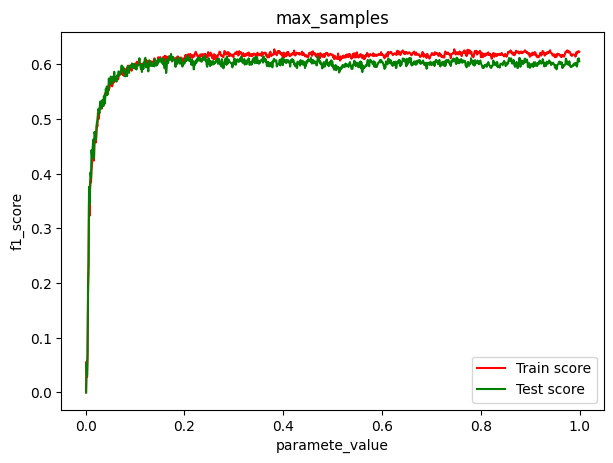

In [33]:
effect(train , test , maxsamples , 'max_samples')

In [34]:
maxfeatures = range(1,X.shape[1])
train = []
test = []

for i in maxfeatures:
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 50 , max_depth = 7 , random_state = 101 , max_features = i)
  f1 ,f2 = calc_score(model , x_train , y_train , x_test , y_test)
  train.append(f1)
  test.append(f2)

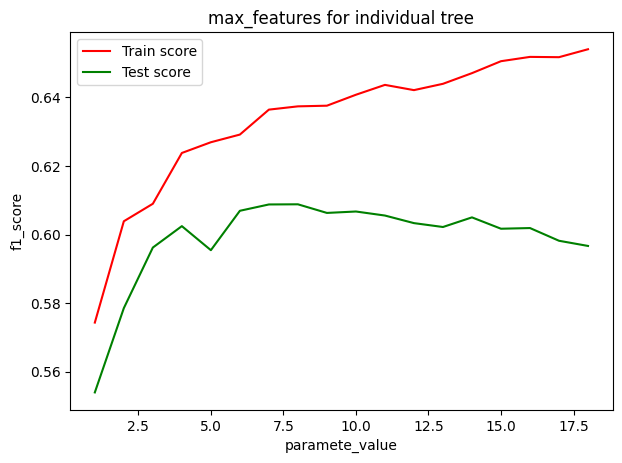

In [35]:
effect(train , test , maxfeatures , 'max_features for individual tree')